In [57]:
import numpy as np
import pandas as pd

In [58]:
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,1,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index = True)

df = df.sample(40)


C:\Users\Paras\AppData\Local\Temp\ipykernel_13740\1490429012.py:5: RuntimeWarning:

covariance is not symmetric positive-semidefinite.



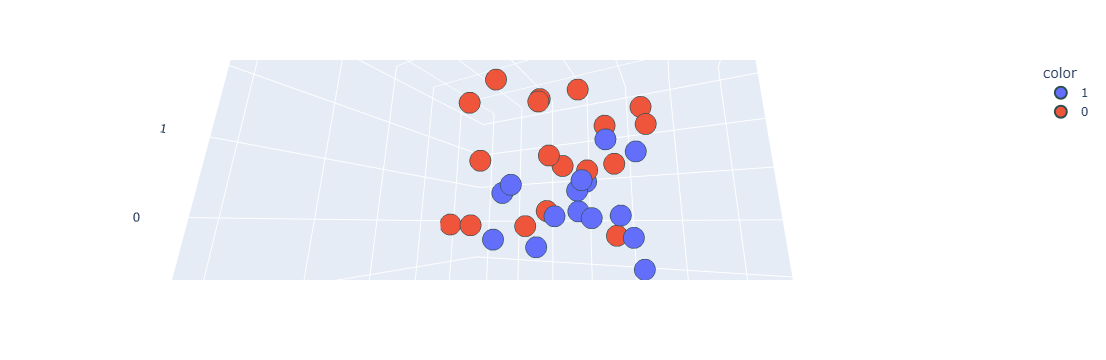

In [59]:
import plotly.express as px


fig = px.scatter_3d(df, x = df['feature1'], y = df['feature2'], z = df['feature3'] ,color = df['target'].astype('str'))
fig.update_traces(marker=dict(size=12, line = dict(width=2, color='DarkSlateGray')), selector=dict(mode='markers'))
fig.show()

In [60]:
# Now lets apply the the feature extraction step by step

In [61]:
# Step-1 Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])


In [62]:
# Step-2 find the covariance matrix
covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print(covariance_matrix)

[[1.02564103 0.43627187 0.2343372 ]
 [0.43627187 1.02564103 0.17844462]
 [0.2343372  0.17844462 1.02564103]]


In [63]:
# Step-3 finding the eigen value and vectors
eigen_values, eigen_vector = np.linalg.eig(covariance_matrix)
eigen_values

array([1.60847181, 0.5848243 , 0.88362696])

In [64]:
eigen_vector

array([[-0.6441267 , -0.72883357, -0.23216896],
       [-0.61951999,  0.67510674, -0.40053199],
       [-0.44865999,  0.11416003,  0.88638124]])

In [65]:
# eigen vector at the 0 index have the highest corresponding eigen value. So we use that to convert it in the 1D 
# Step-4 a. converting into 1D
pc = eigen_vector[0]

In [68]:
transform_data = np.dot(df.iloc[:,0:3], pc.T)
new_dataframe = pd.DataFrame(transform_data, columns=['PC1'])
new_dataframe['target'] = df['target'].values
new_dataframe.head()

,PC1,target
0,1.155774,1
1,0.726924,0
2,0.183449,1
3,-1.324296,1
4,3.397569,1


In [69]:
# Step-4 b. Converting into 2D
pc = eigen_vector[0:2,:]
transform_data = np.dot(df.iloc[:,0:3], pc.T)
new_dataframe = pd.DataFrame(transform_data, columns=['PC1', 'PC2'])
new_dataframe['target'] = df['target'].values
new_dataframe.head()

,PC1,PC2,target
0,1.155774,-0.361730,1
1,0.726924,-0.748348,0
2,0.183449,0.033072,1
3,-1.324296,0.368937,1
4,3.397569,-0.150301,1


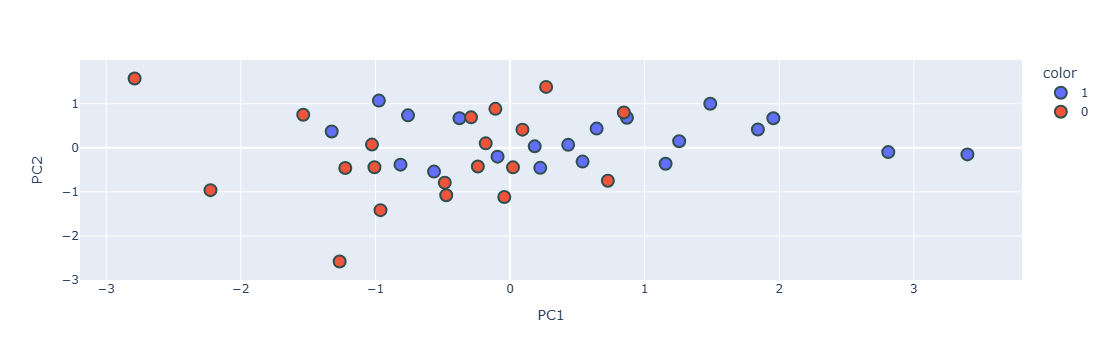

In [72]:
# ploting the 2D data on the graph

fig = px.scatter(new_dataframe, x = new_dataframe['PC1'], y = new_dataframe['PC2'] ,color = new_dataframe['target'].astype('str'))
fig.update_traces(marker=dict(size=12, line = dict(width=2, color='DarkSlateGray')), selector=dict(mode='markers'))
fig.show()